In [12]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR

import imblearn
from imblearn.over_sampling import SMOTE




### Part 2

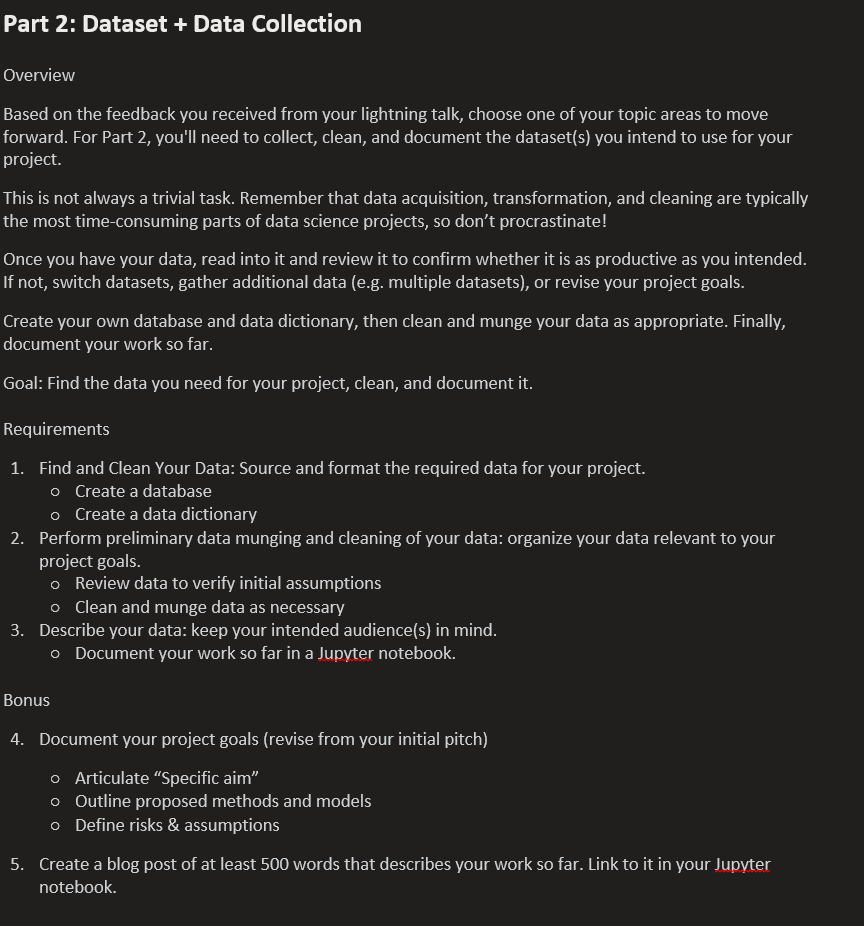

Need to clean the data and format it I guess

Need to create multiple databases (DONE)


Application_train contains target label 

TARGET	Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


In [4]:
df_train = pd.read_csv('../Capstone/home-credit-default-risk/Datasets/application_train.csv')

In [5]:
print(df_train.shape)

(307511, 122)


In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
print(282686 + 24825)
print((24825 / 307511) * 100)

307511
8.072881945686495


In [ ]:
# We can see a huge issue of class imbalance in this case. 
# The percentage of 0's (loans that have been repaid on time) vs the 1's (loans which have not 
# been repaid on time and are in default) is quite small: 8% of the total loan applications are 
# in default

In [7]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
df_train['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [10]:
df_train['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
# judging from the outcome of individuals who don't own a car - I could hypothesise that they are the individuals who would
# not be able to pay off their loans. 

In [11]:
print('df_train')
print(df_train.dtypes.value_counts())



df_train
float64    65
int64      41
object     16
dtype: int64


In [12]:
# Taking a look at the unique classes in each object column

df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
df_train.select_dtypes('float64').nunique()

AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
AMT_ANNUITY                   13672
AMT_GOODS_PRICE                1002
REGION_POPULATION_RELATIVE       81
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         9
AMT_REQ_CREDIT_BUREAU_WEEK        9
AMT_REQ_CREDIT_BUREAU_MON        24
AMT_REQ_CREDIT_BUREAU_QRT        11
AMT_REQ_CREDIT_BUREAU_YEAR       25
Length: 65, dtype: int64

In [14]:
df_train.select_dtypes('int64').nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

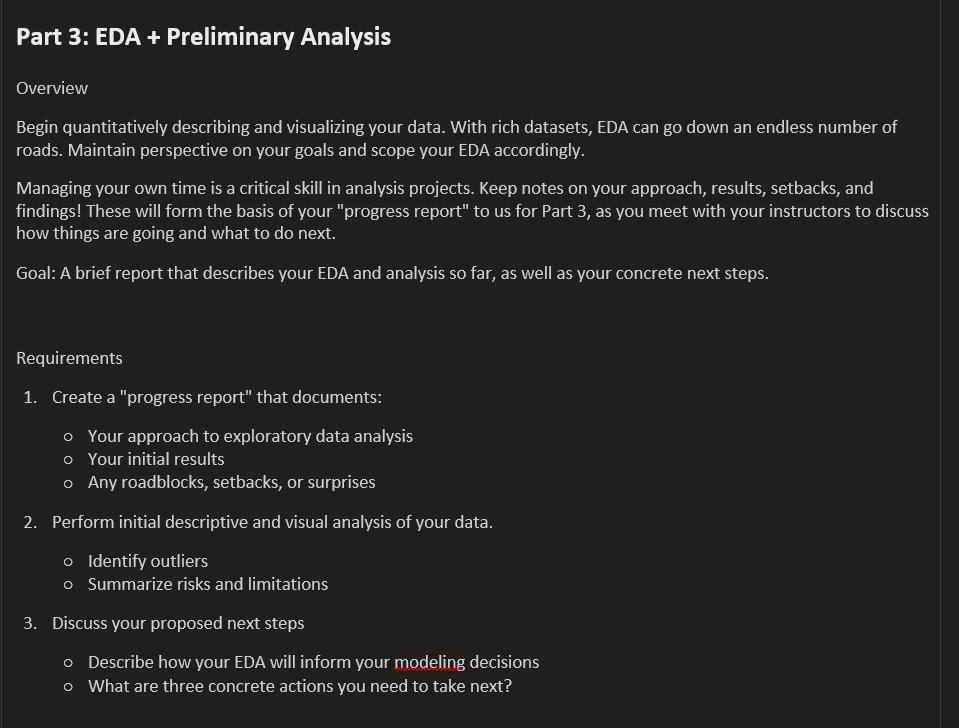

### Basic EDA

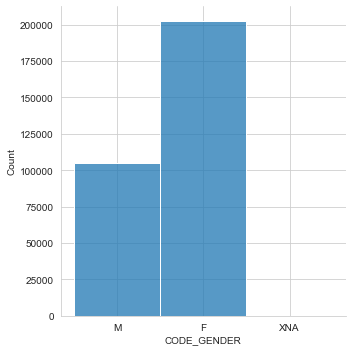

In [15]:
sns.displot(df_train['CODE_GENDER'])

In [16]:
df_train['CODE_GENDER'].value_counts()

# Dropping XNA

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
df_train.loc[df_train['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [18]:
df_train.drop([35657, 38566,83382,189640], inplace = True)

In [19]:
df_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

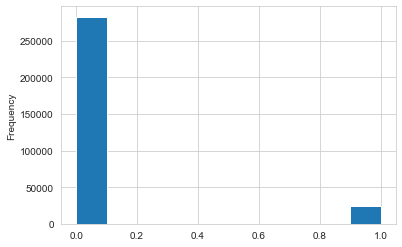

In [20]:
# Take a look at the distribution of the target column to visualise the class imbalance
# Thus showing that ~ 92% of loans were repaid and the other ~8% was not repaid. 
# Can see that the target we are asked to predict for : 1 indicating an individual had payment difficulties

df_train['TARGET'].plot.hist()

## Dealing with NaN's

In [21]:
list(df_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
# work on these NA's before the dummies are done . work on df_train not df

In [22]:
df_train.isna().sum().loc[df_train.isna().sum() != 0]


AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202927
OCCUPATION_TYPE                96389
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

In [ ]:
df_train['OWN_CAR_AGE'][0:100]

In [23]:
df_train['OWN_CAR_AGE'].fillna((0), inplace = True)

In [24]:
df_train['OWN_CAR_AGE'].isna().sum()

0

In [25]:
# Dropping unneccesary columns due to having issues with "recursion"

df_train.drop(['AMT_ANNUITY'], axis = 1, inplace = True)

df_train.drop(['FONDKAPREMONT_MODE'], axis = 1, inplace = True)

df_train.drop(['WEEKDAY_APPR_PROCESS_START'], axis = 1, inplace = True)

df_train.drop(['WALLSMATERIAL_MODE'], axis = 1, inplace = True)

df_train.drop(['FLAG_DOCUMENT_2'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_3'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_4'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_5'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_6'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_7'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_8'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_9'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_10'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_11'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_12'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_13'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_14'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_15'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_16'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_17'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_18'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_19'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_20'], axis = 1, inplace = True)
df_train.drop(['FLAG_DOCUMENT_21'], axis = 1, inplace = True)

df_train.drop(['DAYS_LAST_PHONE_CHANGE'], axis = 1, inplace = True)

df_train.drop(['OBS_30_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)
df_train.drop(['OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

# Dropping these groups as well, since before I tried to impute the mode but for computing power I will drop them now:

df_train.drop(['APARTMENTS_MODE'], axis = 1, inplace = True)
df_train.drop(['BASEMENTAREA_MODE'], axis = 1, inplace = True)
df_train.drop(['YEARS_BEGINEXPLUATATION_MODE'], axis = 1, inplace = True)
df_train.drop(['YEARS_BUILD_MODE'], axis = 1, inplace = True)
df_train.drop(['COMMONAREA_MODE'], axis = 1, inplace = True)
df_train.drop(['ELEVATORS_MODE'], axis = 1, inplace = True)
df_train.drop(['ENTRANCES_MODE'], axis = 1, inplace = True)
df_train.drop(['FLOORSMAX_MODE'], axis = 1, inplace = True)
df_train.drop(['FLOORSMIN_MODE'], axis = 1, inplace = True)
df_train.drop(['LANDAREA_MODE'], axis = 1, inplace = True)
df_train.drop(['LIVINGAPARTMENTS_MODE'], axis = 1, inplace = True)
df_train.drop(['NONLIVINGAPARTMENTS_MODE'], axis = 1, inplace = True)
df_train.drop(['NONLIVINGAREA_MODE'], axis = 1, inplace = True)
df_train.drop(['HOUSETYPE_MODE'], axis = 1, inplace = True)
df_train.drop(['TOTALAREA_MODE'], axis = 1, inplace = True)
df_train.drop(['EMERGENCYSTATE_MODE'], axis = 1, inplace = True)
df_train.drop(['LIVINGAREA_MODE'], axis = 1, inplace = True)



In [26]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0.0000,0.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0.0039,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# df_train.to_csv('df_train_dropped.csv')
# works fine from this point

In [27]:
# these are the groups we want to impute 0's in: 

df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna((0), inplace = True)
df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna((0),inplace = True)
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna((0), inplace = True)
df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna((0), inplace = True)
df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna((0), inplace = True)
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna((0),inplace = True)

df_train['NAME_TYPE_SUITE'].fillna((0), inplace = True)
df_train['CNT_FAM_MEMBERS'].fillna((0), inplace = True)  # taking 0 in this case, assuming the application was for a person on their own






In [ ]:
# df_train.to_csv('df_train_dropped.csv')
# this works fine at this point

In [28]:
# Groups we want to impute a mean:

df_train['AMT_GOODS_PRICE'].fillna((df_train['AMT_GOODS_PRICE'].mean()), inplace = True)
df_train['EXT_SOURCE_1'].fillna((df_train['EXT_SOURCE_1'].mean()), inplace = True)
df_train['EXT_SOURCE_2'].fillna((df_train['EXT_SOURCE_2'].mean()), inplace = True)
df_train['EXT_SOURCE_3'].fillna((df_train['EXT_SOURCE_3'].mean()), inplace = True)
df_train['APARTMENTS_AVG'].fillna((df_train['APARTMENTS_AVG'].mean()), inplace = True)
df_train['BASEMENTAREA_AVG'].fillna((df_train['BASEMENTAREA_AVG'].mean()), inplace = True)
df_train['YEARS_BEGINEXPLUATATION_AVG'].fillna((df_train['YEARS_BEGINEXPLUATATION_AVG'].mean()), inplace = True)
df_train['YEARS_BUILD_AVG'].fillna((df_train['YEARS_BUILD_AVG'].mean()), inplace = True)
df_train['COMMONAREA_AVG'].fillna((df_train['COMMONAREA_AVG'].mean()), inplace = True)
df_train['ELEVATORS_AVG'].fillna((df_train['ELEVATORS_AVG'].mean()), inplace = True)
df_train['ENTRANCES_AVG'].fillna((df_train['ENTRANCES_AVG'].mean()), inplace = True)
df_train['FLOORSMAX_AVG'].fillna((df_train['FLOORSMAX_AVG'].mean()), inplace = True)
df_train['FLOORSMIN_AVG'].fillna((df_train['FLOORSMIN_AVG'].mean()), inplace = True)
df_train['LANDAREA_AVG'].fillna((df_train['LANDAREA_AVG'].mean()), inplace = True)
df_train['LIVINGAPARTMENTS_AVG'].fillna((df_train['LIVINGAPARTMENTS_AVG'].mean()), inplace = True)
df_train['NONLIVINGAPARTMENTS_AVG'].fillna((df_train['NONLIVINGAPARTMENTS_AVG'].mean()), inplace = True)
df_train['NONLIVINGAREA_AVG'].fillna((df_train['NONLIVINGAREA_AVG'].mean()), inplace = True)
df_train['LIVINGAREA_AVG'].fillna((df_train['LIVINGAREA_AVG'].mean()), inplace = True)


df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((df_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
df_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((df_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean()), inplace = True)
     

    

In [ ]:
df_train.to_csv('df_train_imputebeforemedian.csv')

In [ ]:
df_train = pd.read_csv('../Capstone/df_train_imputebeforemedian.csv')

In [ ]:
df_train.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [29]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0.0000,0.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0.0039,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# for these groups I will be imputing the median instead of the mode. due to issues with mode imputation. 
# Also given the CLT will take into account for distribution of skewness 


df_train['APARTMENTS_MEDI'].fillna((df_train['APARTMENTS_MEDI'].median()), inplace = True)


df_train['BASEMENTAREA_MEDI'].fillna((df_train['BASEMENTAREA_MEDI'].median()), inplace = True)

df_train['YEARS_BEGINEXPLUATATION_MEDI'].fillna((df_train['YEARS_BEGINEXPLUATATION_MEDI'].median()), inplace = True)

df_train['YEARS_BUILD_MEDI'].fillna((df_train['YEARS_BUILD_MEDI'].median()), inplace = True)

df_train['COMMONAREA_MEDI'].fillna((df_train['COMMONAREA_MEDI'].median()), inplace = True)

df_train['ELEVATORS_MEDI'].fillna((df_train['ELEVATORS_MEDI'].median()), inplace = True)

df_train['ENTRANCES_MEDI'].fillna((df_train['ENTRANCES_MEDI'].median()), inplace = True)

df_train['FLOORSMAX_MEDI'].fillna((df_train['FLOORSMAX_MEDI'].median()), inplace = True)

df_train['FLOORSMIN_MEDI'].fillna((df_train['FLOORSMIN_MEDI'].median()), inplace = True)

df_train['LANDAREA_MEDI'].fillna((df_train['LANDAREA_MEDI'].median()), inplace = True)

df_train['LIVINGAPARTMENTS_MEDI'].fillna((df_train['LIVINGAPARTMENTS_MEDI'].median()), inplace = True)

df_train['NONLIVINGAPARTMENTS_MEDI'].fillna((df_train['NONLIVINGAPARTMENTS_MEDI'].median()), inplace = True)

df_train['NONLIVINGAREA_MEDI'].fillna((df_train['NONLIVINGAREA_MEDI'].median()), inplace = True)

df_train['LIVINGAREA_MEDI'].fillna((df_train['LIVINGAREA_MEDI'].median()), inplace = True)



In [31]:
# Groups to replace things with:

df_train['OCCUPATION_TYPE'].fillna(('Other'), inplace = True)

In [32]:
df_train['OCCUPATION_TYPE'].isna().sum()

0

In [33]:
df_train.isna().sum().loc[df_train.isna().sum() != 0]

# after the below imputation we have no na's in the whole dataframe!


Series([], dtype: int64)

In [34]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0.0000,0.0000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0.0039,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Saving the cleaned data into a new csv file

In [35]:
df_train.to_csv('df_cleaned.csv')

# can't even do that apparently
# RecursionError: maximum recursion depth exceeded in __instancecheck__


## Reading in the cleaned data

In [13]:
df_train = pd.read_csv('../Capstone/df_cleaned.csv')

In [14]:
df_train.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [15]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0.0000,0.0000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0.0039,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bit more EDA

In [16]:
(df_train['DAYS_BIRTH'] / -365).describe()


2021-03-09 18:42:22.398 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-03-09 18:42:22.400 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [17]:
df_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

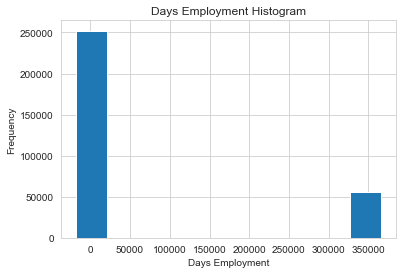

In [18]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')

plt.xlabel('Days Employment')

In [19]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


#### Correlations

In [20]:
correlations = df_train.corr()['TARGET'].sort_values()

In [21]:
# Showing correlation

print('Most Positive Correlation:\n', correlations.tail(15))
print('Most Negative Correlation:\n', correlations.head(15))

Most Positive Correlation:
 CNT_FAM_MEMBERS                0.009315
CNT_CHILDREN                   0.019189
FLAG_WORK_PHONE                0.028533
DEF_60_CNT_SOCIAL_CIRCLE       0.031270
DEF_30_CNT_SOCIAL_CIRCLE       0.032235
LIVE_CITY_NOT_WORK_CITY        0.032517
DAYS_REGISTRATION              0.041976
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlation:
 EXT_SOURCE_2                 -0.160303
EXT_SOURCE_3                 -0.157403
EXT_SOURCE_1                 -0.099152
DAYS_EMPLOYED                -0.044934
AMT_GOODS_PRICE              -0.039630
FLOORSMAX_MEDI               -0.039160
REGION_POPULATION_RELATIVE   -0.037225
ELEVATORS_MEDI               -0.035553
AMT

Can see that DAYS_BIRTH has the most positive correlation, obviously TARGET with TARGET is not neccessary. 

What it seems to be showing is that DAYS_BIRTH is the age in days of the client at the time of the loan in negative days.
Strangely the correlation is positive but the value of this feature is negative, showing that the as the client gets older theyu are less likely to default on their loan. 

In [22]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.078242160036194

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Text(0, 0.5, 'Count')

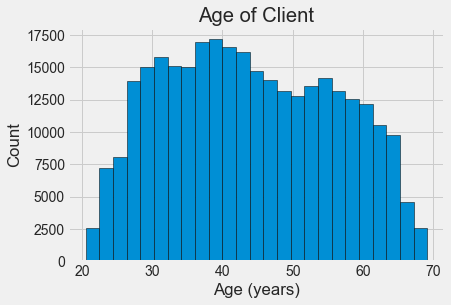

In [23]:
# Plot distribution of ages in years

# Set the style of plots
plt.style.use('fivethirtyeight')

plt.hist(df_train['DAYS_BIRTH'] / 365, bins = 25, edgecolor = 'k')
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [24]:
AGE = (df_train['DAYS_BIRTH'] / 365)

In [25]:
np.mean(AGE)

43.93706101622859

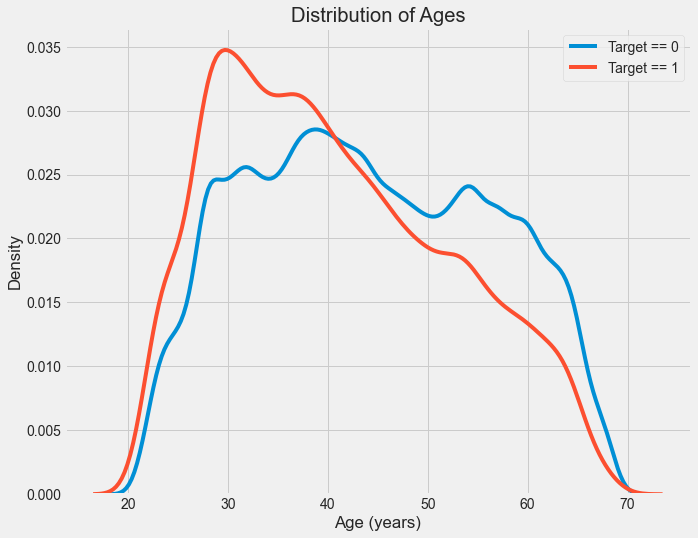

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density') 
plt.title('Distribution of Ages')
plt.legend()

We can see that the target (1) skews toward the younger side of the age bracket than older. 


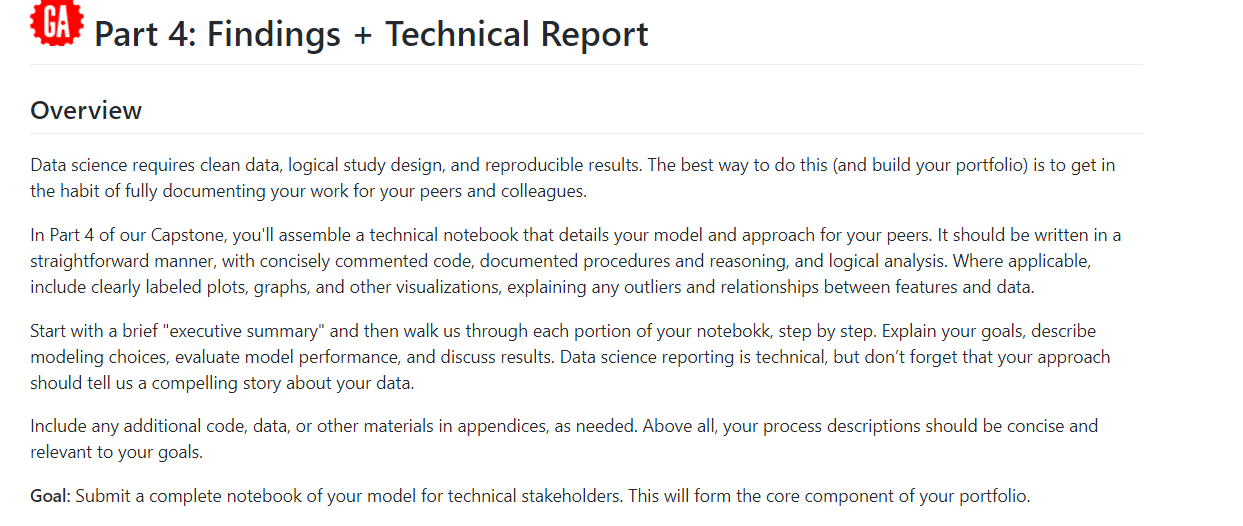

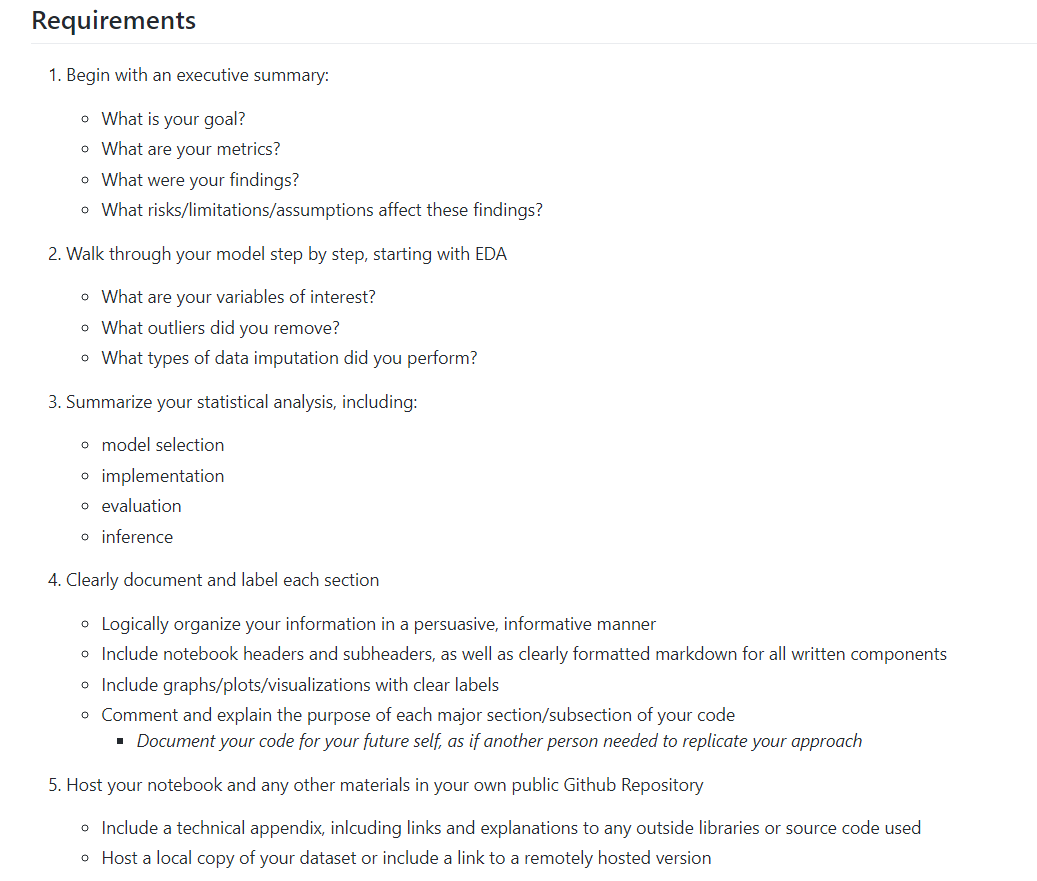

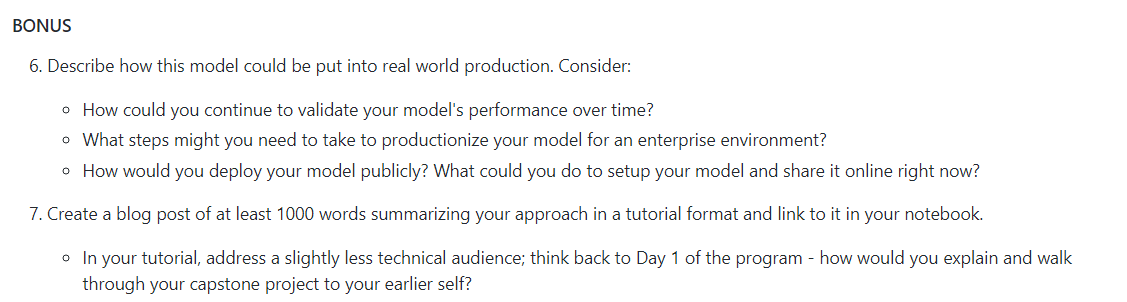

## Train Test Split

In [ ]:
# Steps. 
pipeline on training and testing



1. train test split
2. pd.get dummies
3. smote

In [ ]:
# one-hot encoding of categorical variables

#don't do this not yet. 
# df = pd.get_dummies(df_train)

# df.head()

In [27]:
list(df_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'E

In [29]:
# for naming purposes I will be changing the name of my current dataframe (df_train) to df ,



df = df_train



In [30]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,0.0000,0.0000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,0.0039,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# making dummy for X now:
    
# X = df.drop(['TARGET', 'SK_ID_CURR', ])


In [31]:
NAME_CONTRACT_TYPE_dummies = pd.get_dummies(df['NAME_CONTRACT_TYPE'], drop_first = True)
df.drop(['NAME_CONTRACT_TYPE'], axis = 1, inplace = True)

CODE_GENDER_dummies = pd.get_dummies(df['CODE_GENDER'], drop_first = True)
df.drop(['CODE_GENDER'], axis = 1, inplace = True)

FLAG_OWN_CAR_dummies = pd.get_dummies(df['FLAG_OWN_CAR'], drop_first = True)
df.drop(['FLAG_OWN_CAR'], axis = 1, inplace = True)

FLAG_OWN_REALTY_dummies = pd.get_dummies(df['FLAG_OWN_REALTY'], drop_first = True)
df.drop(['FLAG_OWN_REALTY'], axis = 1, inplace = True)

NAME_TYPE_SUITE_dummies = pd.get_dummies(df['NAME_TYPE_SUITE'], drop_first = True)
df.drop(['NAME_TYPE_SUITE'], axis = 1, inplace = True)

NAME_INCOME_TYPE_dummies = pd.get_dummies(df['NAME_INCOME_TYPE'], drop_first = True)   
df.drop(['NAME_INCOME_TYPE'], axis = 1, inplace = True)

NAME_EDUCATION_TYPE_dummies = pd.get_dummies(df['NAME_EDUCATION_TYPE'], drop_first = True)
df.drop(['NAME_EDUCATION_TYPE'], axis = 1, inplace = True)

NAME_FAMILY_STATUS_dummies = pd.get_dummies(df['NAME_FAMILY_STATUS'], drop_first = True)
df.drop(['NAME_FAMILY_STATUS'], axis = 1, inplace = True)

NAME_HOUSING_TYPE_dummies = pd.get_dummies(df['NAME_HOUSING_TYPE'], drop_first = True)
df.drop(['NAME_HOUSING_TYPE'], axis = 1, inplace = True)

OCCUPATION_TYPE_dummies = pd.get_dummies(df['OCCUPATION_TYPE'], drop_first = True)
df.drop(['OCCUPATION_TYPE'], axis = 1, inplace = True)

ORGANIZATION_TYPE_dummies = pd.get_dummies(df['ORGANIZATION_TYPE'], drop_first = True)
df.drop(['ORGANIZATION_TYPE'], axis = 1, inplace = True)


In [32]:
dummies = pd.concat([NAME_CONTRACT_TYPE_dummies, CODE_GENDER_dummies, FLAG_OWN_CAR_dummies,
FLAG_OWN_REALTY_dummies, NAME_TYPE_SUITE_dummies, NAME_INCOME_TYPE_dummies, 
NAME_EDUCATION_TYPE_dummies, NAME_FAMILY_STATUS_dummies, NAME_HOUSING_TYPE_dummies, OCCUPATION_TYPE_dummies,
ORGANIZATION_TYPE_dummies], axis = 1)

In [33]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,351000.0,0.018801,9461,-637,-3648.0,...,0.0000,0.0000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,1129500.0,0.003541,16765,-1188,-1186.0,...,0.0039,0.0100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,135000.0,0.010032,19046,-225,-4260.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,297000.0,0.008019,19005,-3039,-9833.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,513000.0,0.028663,19932,-3038,-4311.0,...,0.0000,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_with_dummy = pd.concat([df,dummies], axis = 1)


# Just to explain what's happened here, since viewing what has been created is difficult due to more problems like 
# SystemError_ _built-in function is_scalar_ returned a result with an error set 
# What i have done is combine the dummy variables created above with the 'df' dataframe 
# will now be using that as my X matrix and then will train test split on that


# y = df['TARGET']

KeyboardInterrupt: 

In [ ]:
df_with_dummy.head()

In [39]:
# df_with_dummy.to_csv('df_final.csv')

In [44]:
df_with_dummy = pd.read_csv('../Capstone/df_final.csv')

In [45]:
df_with_dummy.shape

# as we can see here, all dummies have been combined

(307507, 175)

In [46]:
df_with_dummy.drop(['TARGET', 'SK_ID_CURR'], axis = 1, inplace = True)

In [47]:
df_with_dummy.shape

# have dropped TARGET and SK_ID

(307507, 173)

In [48]:
y = df['TARGET']
X = df_with_dummy

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
X_train.shape

(246005, 173)

In [51]:
X_test.shape

(61502, 173)

In [52]:
y_train.shape

(246005,)

In [53]:
y_test.shape

(61502,)

In [54]:
list(X_train.columns)

['Unnamed: 0',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPL

In [55]:
type(X_train)

pandas.core.frame.DataFrame

In [57]:
X_train = np.asarray(X_train)

In [58]:
# Oversampling

# smote on x_train and y_train , train only. not test

sm = SMOTE(random_state= 12, sampling_strategy = 1.0,  n_jobs = -1, )

x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [59]:
x_train_res

array([[2.42592000e+05, 0.00000000e+00, 2.25000000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60051000e+05, 0.00000000e+00, 2.02500000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.42146000e+05, 2.00000000e+00, 3.15000000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.08770407e+05, 0.00000000e+00, 3.76493404e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66554880e+05, 0.00000000e+00, 1.57500000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21784827e+04, 0.00000000e+00, 9.00000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
y_train_res.value_counts()

1    226201
0    226201
Name: TARGET, dtype: int64

In [ ]:
log reg & svm will allow us to provide a weightage for a class

## Modelling

In [61]:
# Finding the baseline:

pd.Series(y_train).value_counts(normalize = True)

0    0.919498
1    0.080502
Name: TARGET, dtype: float64

In [ ]:
# Baseline is 92% before SMOTE / upsample. 

In [62]:
pd.Series(y_train_res).value_counts(normalize = True)


1    0.5
0    0.5
Name: TARGET, dtype: float64

In [ ]:
# Already 11points ahead of the baseline 

In [ ]:
# Log Reg Implementation

In [63]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
LogReg = LogisticRegression(C = 1.0 , penalty = 'l2')


In [ ]:
# class_weight = for the minority class 1's give it 0.9 and for the majority class of 0's make it 0.1

In [64]:
LogReg.fit(x_train_res, y_train_res)

LogisticRegression()

In [66]:
LogReg.score(X_test, y_test)

0.6052323501674742

In [67]:
confusion_matrix(y_test, LogReg.predict(X_test))

array([[34594, 21887],
       [ 2392,  2629]], dtype=int64)

In [68]:
print(classification_report(y_test, LogReg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     56481
           1       0.11      0.52      0.18      5021

    accuracy                           0.61     61502
   macro avg       0.52      0.57      0.46     61502
weighted avg       0.87      0.61      0.69     61502



In [69]:
LogReg.coef_

array([[ 1.03714224e-06,  3.42372346e-08,  1.11778204e-07,
         3.43413410e-06, -3.96893381e-06, -4.55317383e-10,
         3.02558890e-06, -9.84796516e-07,  2.05892870e-05,
         2.66048319e-05,  9.06262867e-08,  3.89916177e-08,
         3.97402248e-08,  3.80053941e-08,  3.87516498e-08,
        -7.50539482e-09, -5.55528475e-10,  8.86036119e-08,
         1.56885486e-07,  1.58264187e-07,  2.98394672e-07,
         1.90396053e-09,  3.45395009e-09,  1.35863726e-09,
         3.14972606e-08,  5.16558249e-08,  3.01478068e-08,
        -1.33287683e-08, -5.71485821e-08, -5.01273398e-08,
         1.06546720e-09,  1.77101845e-09,  3.73533043e-08,
         2.74713648e-08,  7.92810922e-10, -1.67793005e-09,
         3.74987448e-09,  1.42438968e-09,  4.90300014e-09,
         1.88959157e-09,  2.26110742e-09,  7.12181976e-11,
         3.57099882e-10,  2.86156254e-10, -1.11071898e-09,
         9.91279936e-10,  3.75879906e-08,  2.77746564e-08,
        -6.58503046e-10, -7.10051450e-09,  2.96963782e-0

In [70]:
LogReg_coef = pd.DataFrame(LogReg.coef_[0], columns = ['coeff'])

LogReg_coef['categories'] = df_with_dummy.columns

LogReg_coef['abs_coeff'] = np.abs(LogReg_coef['coeff'])

In [71]:
LogReg_coef.sort_values(by = 'abs_coeff', ascending=False)

,coeff,categories,abs_coeff
9,2.660483e-05,DAYS_ID_PUBLISH,2.660483e-05
8,2.058929e-05,DAYS_REGISTRATION,2.058929e-05
4,-3.968934e-06,AMT_GOODS_PRICE,3.968934e-06
3,3.434134e-06,AMT_CREDIT,3.434134e-06
6,3.025589e-06,DAYS_BIRTH,3.025589e-06
...,...,...,...
140,2.597380e-11,Industry: type 8,2.597380e-11
138,2.509075e-11,Industry: type 6,2.509075e-11
133,1.052444e-11,Industry: type 13,1.052444e-11
91,-6.629590e-12,Unknown,6.629590e-12


In [ ]:

# The Logistic Regression is predicting 61% of the Targets will be defaulting compared to the baseline of 50%
# Coefficients are showing the log odds ratio
# DAYS_BIRTH is the highest out all of the other categories as hypothesised. Younger people will default on their loans 

### Will be pickling this model for the non technical demo presentation

In [72]:
import pickle

In [74]:
# this is pickling the model

with open('LogReg_pickle', 'wb') as f:
    pickle.dump(LogReg,f)

In [75]:
# this is unpickling the model and allows for deployment on another machine etc

with open('LogReg_pickle', 'rb') as f:
    model = pickle.load(f)
#     where model is the new name of the model which has been saved to memory

In [85]:
result = model.score(X_test, y_test)
print(result)

# how are we supposed to use this for the website case now? - 

0.6052323501674742


## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

RandForest = RandomForestRegressor()

In [146]:
gridsearch_params = {'n_estimators': [10,50,100], 'max_depth':[3,5,7,9],
                     'max_features':['auto','sqrt', 'log2'], 'max_leaf_nodes':[50,100,200,None]}

In [147]:
RF_gridsearch = GridSearchCV(RandForest, gridsearch_params, cv = 5, n_jobs=-1, verbose=1)
RF_gridsearch.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [ ]:
#  run this later tonight

In [168]:
RF_1 = RandomForestRegressor(n_estimators = 100, random_state=12, verbose = 1, n_jobs = -1)
RF_1.fit(x_train_res, y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomForestRegressor(n_jobs=-1, random_state=12, verbose=1)

In [169]:
RF_1.score(X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


0.01056238056355674

In [170]:
RF_2 = RandomForestRegressor(n_estimators = 150, random_state=12, verbose = 1, n_jobs = -1)
RF_2.fit(x_train_res, y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.4min finished


RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=12, verbose=1)

In [171]:
RF_2.score(X_test, y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.6s finished


0.012940142156764534

In [ ]:
xtra trees
random forest

xg / ada boost


## Gradient Boosting Algorithm

In [156]:
GBreg = GradientBoostingRegressor(loss = 'ls')

In [157]:

gridsearch_params = {'learning_rate':[0.1],
                     'n_estimators':[100], 
                     'max_depth':[3,5,7],
                     'min_samples_split':[2,3,4],
                     'max_features':['auto','sqrt', 'log2']}

In [158]:
GBreg_gridsearch = GridSearchCV(GBreg, gridsearch_params, cv = 5, n_jobs=-1, verbose=True)
GBreg_gridsearch.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100]},
             verbose=True)

In [160]:
GBreg_gridsearch.best_score_

0.16635287338145996

In [ ]:
Gradient Boosting explains approx - 0.16 of the loans that will be defaulted in the data set

In [161]:
GBreg_gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 100}

In [166]:
GBreg_best = GBreg_gridsearch.best_estimator_
GBreg_best.fit(x_train_res, y_train_res)

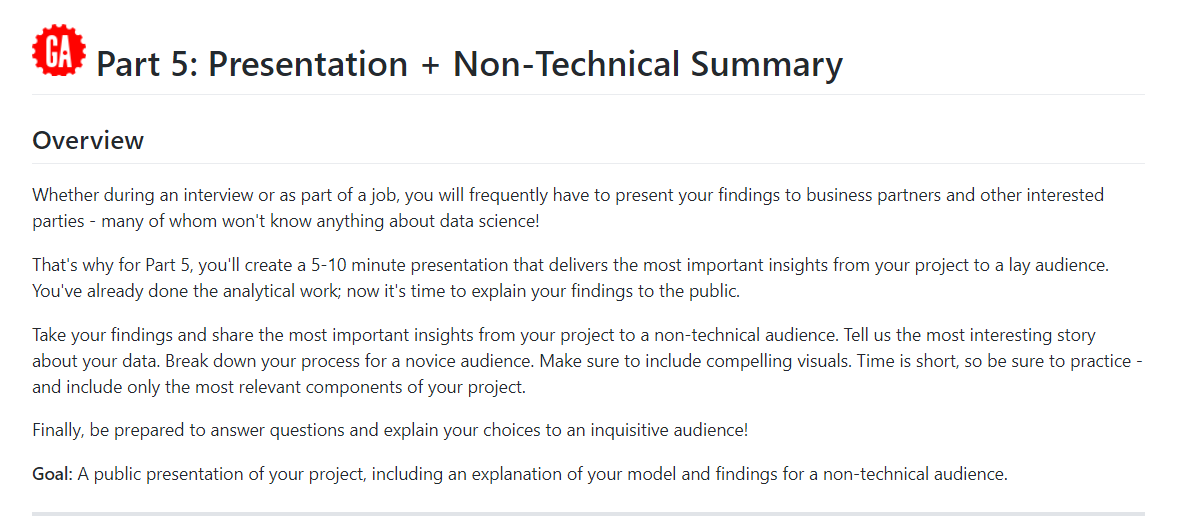

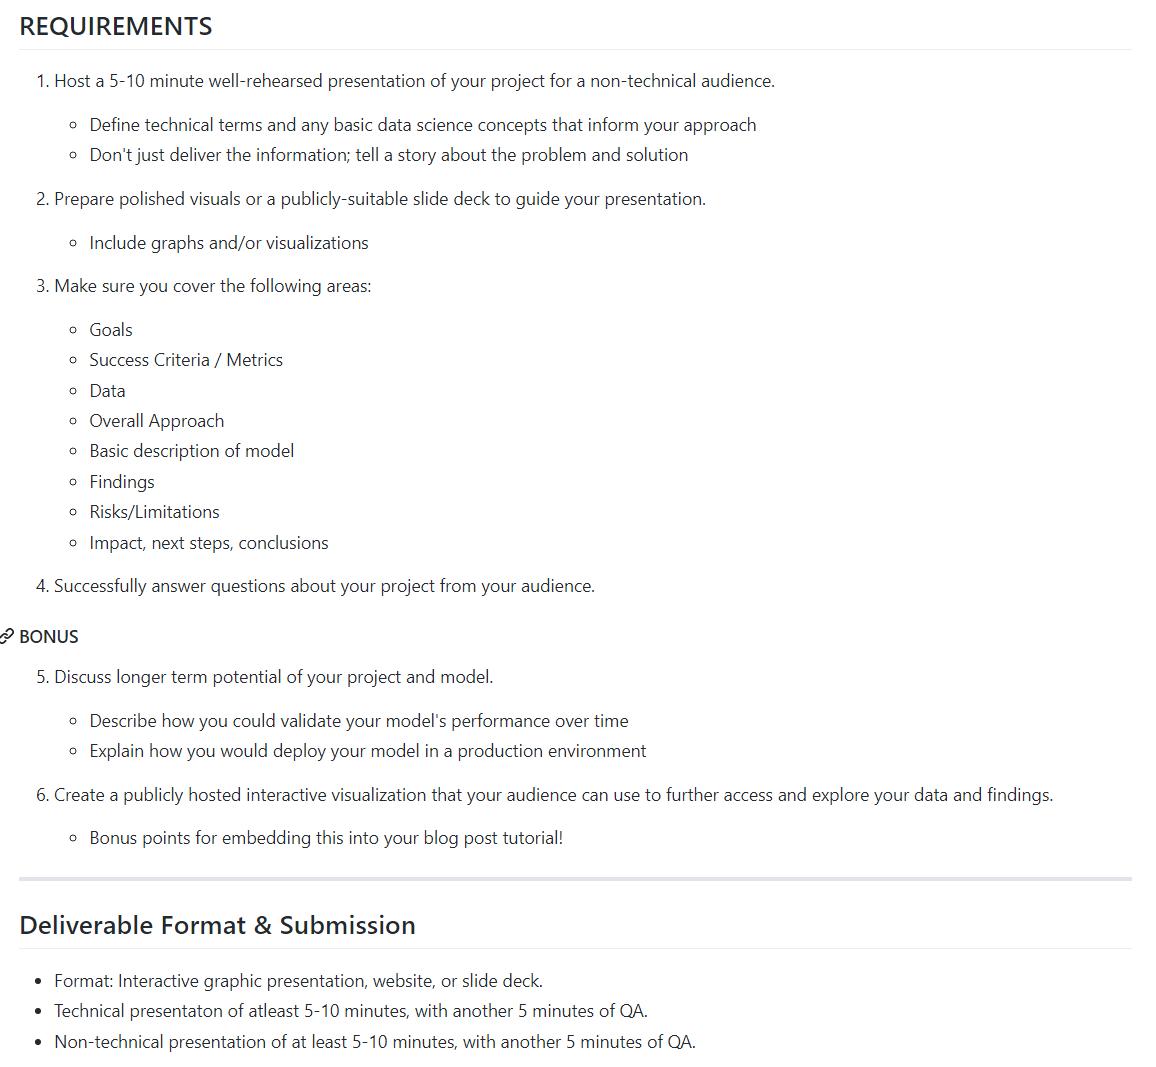